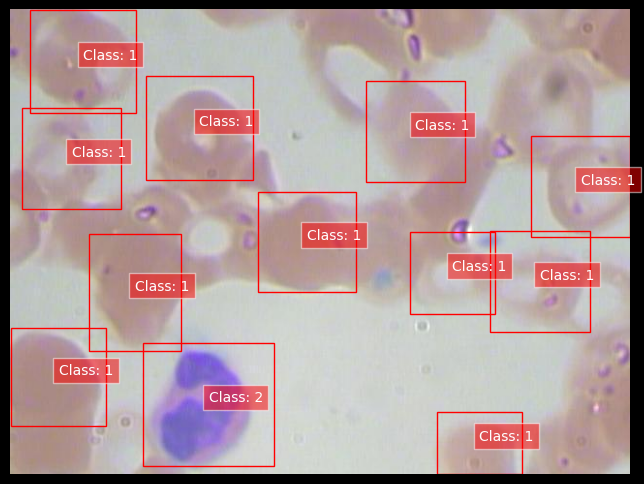

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision import transforms
from dataset import *
# 設定影像與標註的路徑
img_dir   = 'BCD/train/images'
label_dir = 'BCD/train/labels'

# 建立資料集，S, B, C 設定為 7, 2, 3
dataset = BCDataset(img_dir=img_dir, label_dir=label_dir, S=7, B=2, C=3)

# 顯示測試影像和標註框
index = 50
image, label_matrix = dataset[index]

plt.figure(figsize=(8, 8))
plt.imshow(image)
ax = plt.gca()

# 解析標註矩陣並畫出標註框
S = dataset.S
for i in range(S):
    for j in range(S):
        if label_matrix[i, j, 3] == 1:  # 確認物件存在
            x_cell, y_cell, width_cell, height_cell = label_matrix[i, j, 4:8].tolist()
            class_label = int(torch.argmax(label_matrix[i, j, :3]))

            x = (j + x_cell) / S * image.width
            y = (i + y_cell) / S * image.height
            width = width_cell / S * image.width
            height = height_cell / S * image.height

            rect = patches.Rectangle(
                (x - width / 2, y - height / 2), width, height,
                linewidth=1, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)
            plt.text(x, y, f"Class: {class_label}", color="white",
                     verticalalignment="bottom", bbox={"facecolor": "red", "alpha": 0.5})

plt.axis("off")
plt.show()


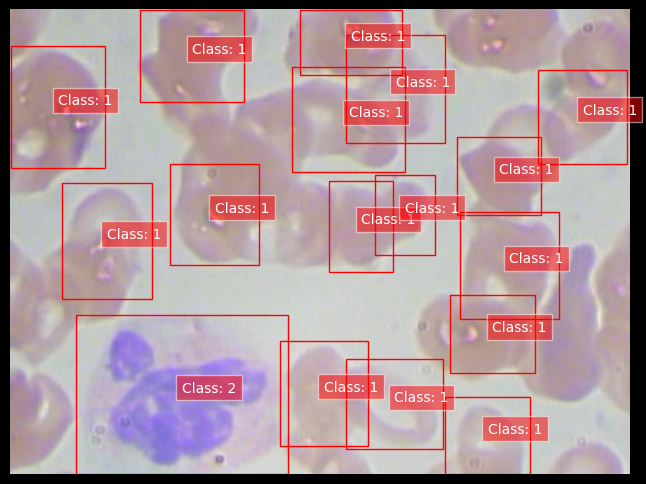

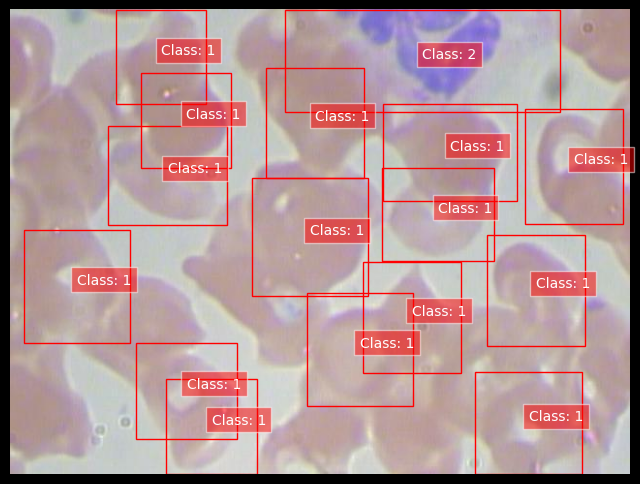

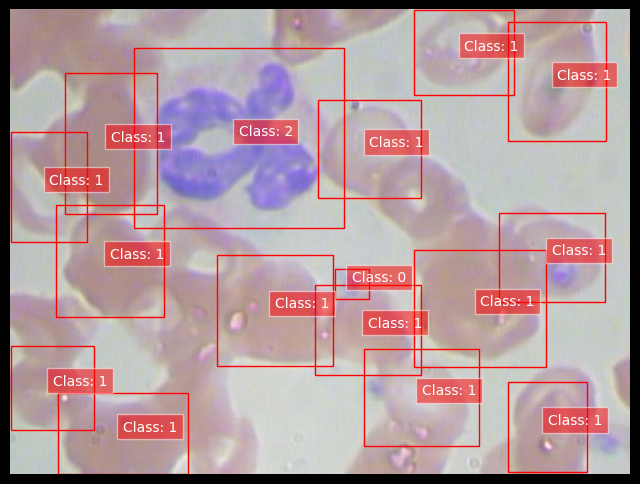

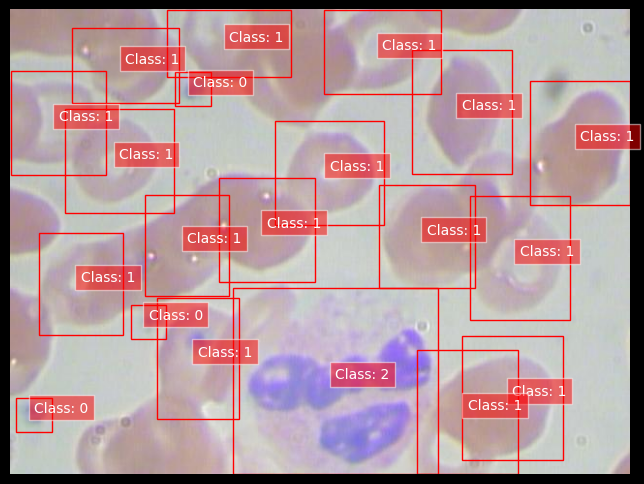

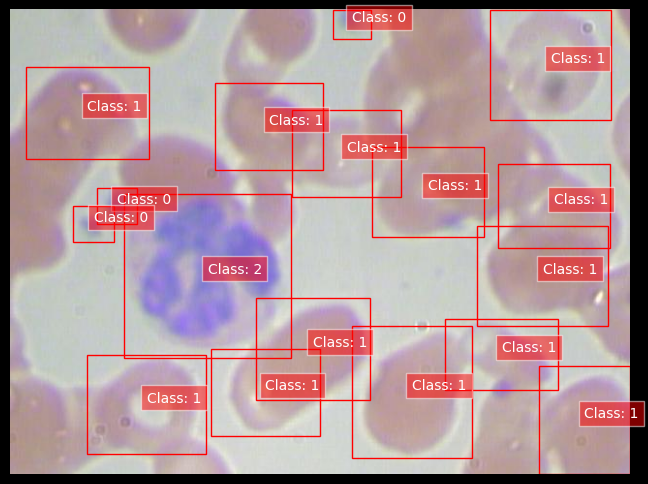

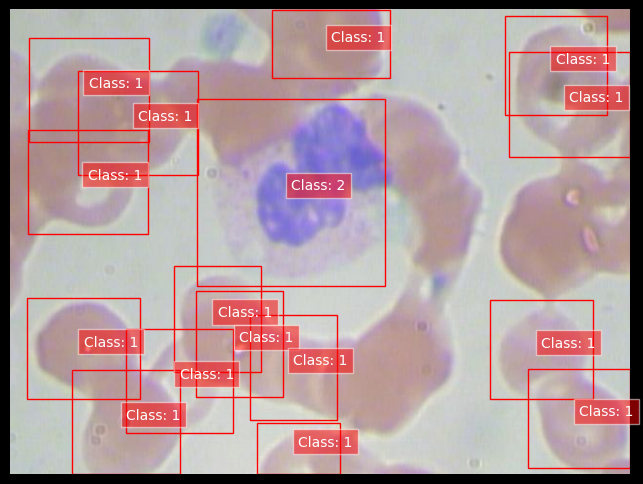

In [2]:
def show_data(dataset,start,end):
    for index in range(start,end+1):
        image, label_matrix = dataset[index]

        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        ax = plt.gca()

        # 解析標註矩陣並畫出標註框
        S = dataset.S
        for i in range(S):
            for j in range(S):
                if label_matrix[i, j, 3] == 1:  # 確認物件存在
                    x_cell, y_cell, width_cell, height_cell = label_matrix[i, j, 4:8].tolist()
                    class_label = int(torch.argmax(label_matrix[i, j, :3]))

                    x = (j + x_cell) / S * image.width
                    y = (i + y_cell) / S * image.height
                    width = width_cell / S * image.width
                    height = height_cell / S * image.height

                    rect = patches.Rectangle(
                        (x - width / 2, y - height / 2), width, height,
                        linewidth=1, edgecolor='r', facecolor='none'
                    )
                    ax.add_patch(rect)
                    plt.text(x, y, f"Class: {class_label}", color="white",
                            verticalalignment="bottom", bbox={"facecolor": "red", "alpha": 0.5})
        plt.axis("off")
        plt.show()
show_data(dataset,0,5)